In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Import the MNIST Dataset

In [2]:
from keras.datasets import mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

In [3]:
print(Xtrain.shape)
print("Training Set: %s images of %s x %s pixels each" %(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))

(60000, 28, 28)
Training Set: 60000 images of 28 x 28 pixels each


In [4]:
print(Xtest.shape)
print("Training Set: %s images of %s x %s pixels each" %(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))

(10000, 28, 28)
Training Set: 10000 images of 28 x 28 pixels each


#### Attempt to display some images in the dataset

#### Training Set

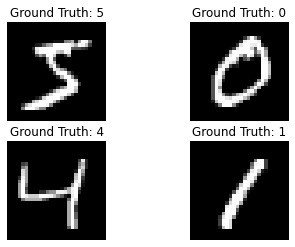

In [5]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Ground Truth: " + str(Ytrain[i]) )
plt.show()

#### Test Set

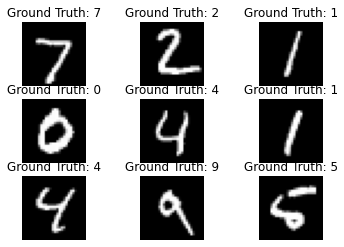

In [15]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(Xtest[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Ground Truth: " + str(Ytest[i]) )
plt.show()    

In [17]:
Ytest[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [19]:
LR.predict(Xtest_reshape[:9,:])

array([7, 2, 1, 0, 4, 1, 4, 9, 6], dtype=uint8)

#### Preprocessing

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [9]:
Xtrain_reshape = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest_reshape = Xtest.reshape(Xtest.shape[0],-1)

scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain_reshape)
Xtrain_reshape = scaler.transform(Xtrain_reshape)
Xtest_reshape = scaler.transform(Xtest_reshape)

### A. Building different models for the same problem

### <font color=red>Takeaway 1 <br> <br> Using different models for the same problem: Logistic Regression, Random Forest, MLP, CNNs</font>

#### 1. Logistic Regression (Classifier)

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(verbose=2)
LR.fit(Xtrain_reshape[:10000,:],Ytrain[:10000])
#LR.fit(Xtrain_reshape,Ytrain)
print("Training Accuracy: " + str(accuracy_score(LR.predict(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(LR.predict(Xtest_reshape),Ytest)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Accuracy: 0.9664
Test Accuracy: 0.9053


C:\Users\Ming\.conda\envs\ming\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


#### 2. Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
RandForest = RandomForestClassifier(n_estimators=20,max_depth=8,min_samples_leaf=50)
RandForest.fit(Xtrain_reshape[:1000,:],Ytrain[:1000])
print("Training Accuracy: " + str(accuracy_score(RandForest.predict(Xtrain_reshape[:1000,:]),Ytrain[:1000])))
print("Test Accuracy: " + str(accuracy_score(RandForest.predict(Xtest_reshape),Ytest)))

Training Accuracy: 0.988
Test Accuracy: 0.8346


#### <font color=red>Takeaway 2 <br> <br> Amount of Training Input Data <br> <br> More data gets you more accurate results.</font>

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200,max_depth=25,min_samples_leaf=7)
RF.fit(Xtrain_reshape[:10000,:],Ytrain[:10000])
print("Training Accuracy: " + str(accuracy_score(RF.predict(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(RF.predict(Xtest_reshape),Ytest)))

Training Accuracy: 0.9795
Test Accuracy: 0.9391


#### 3. Multilayer Perceptron Classifier

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
NN = keras.Sequential()
NN.add(Dense(50, activation='relu'))
NN.add(Dropout(0.7))
NN.add(Dense(10, activation='relu'))
NN.add(Dense(10, activation='softmax'))

NN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0002),metrics=['accuracy'])
NN.fit(Xtrain_reshape[:10000,:],Ytrain[:10000],batch_size=200,epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 2.2742 - accuracy: 0.1371
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 2.1232 - accuracy: 0.2066
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 1.9817 - accuracy: 0.2584
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.8576 - accuracy: 0.3065
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 1.7575 - accuracy: 0.3527
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 1.6726 - accuracy: 0.3877
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 1.5809 - accuracy: 0.4442
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 1.5053 - accuracy: 0.4858
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 1.4416 - accuracy: 0.5256
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 1.3753 - accuracy: 0.5703
Epoch 11/

In [26]:
print("NN")
print("Training Accuracy: " + str(accuracy_score(NN.predict_classes(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(NN.predict_classes(Xtrain_reshape[:1000,:]),Ytrain[:1000])))

NN
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Training Accuracy: 0.9373
Test Accuracy: 0.941


#### <font color=red>Takeaway 3 <br> <br> Do not mix training and test data!!!</font>

In [30]:
NN_deep = keras.Sequential()
NN_deep.add(Dense(100, activation='relu'))
NN_deep.add(Dense(10, activation='softmax'))

NN_deep.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])
NN_deep.fit(Xtrain_reshape,Ytrain,batch_size=200,epochs=300)

Epoch 1/300
300/300 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.9174
Epoch 2/300
300/300 [==============================] - 1s 2ms/step - loss: 0.1291 - accuracy: 0.9624
Epoch 3/300
300/300 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9722
Epoch 4/300
300/300 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9787
Epoch 5/300
300/300 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9830
Epoch 6/300
300/300 [==============================] - 1s 2ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 7/300
300/300 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9885
Epoch 8/300
300/300 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9900
Epoch 9/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 10/300
300/300 [==============================] - 1s 2ms/step - loss: 0.0229 - accura

300/300 [==============================] - 1s 2ms/step - loss: 8.0943e-09 - accuracy: 1.0000
Epoch 157/300
300/300 [==============================] - 1s 2ms/step - loss: 7.6870e-09 - accuracy: 1.0000
Epoch 158/300
300/300 [==============================] - 1s 2ms/step - loss: 7.3771e-09 - accuracy: 1.0000
Epoch 159/300
300/300 [==============================] - 1s 2ms/step - loss: 6.9817e-09 - accuracy: 1.0000
Epoch 160/300
300/300 [==============================] - 1s 2ms/step - loss: 6.6777e-09 - accuracy: 1.0000
Epoch 161/300
300/300 [==============================] - 1s 2ms/step - loss: 6.3717e-09 - accuracy: 1.0000
Epoch 162/300
300/300 [==============================] - 1s 2ms/step - loss: 6.0578e-09 - accuracy: 1.0000
Epoch 163/300
300/300 [==============================] - 1s 2ms/step - loss: 5.8671e-09 - accuracy: 1.0000
Epoch 164/300
300/300 [==============================] - 1s 2ms/step - loss: 5.5730e-09 - accuracy: 1.0000
Epoch 165/300
300/300 [============================

In [31]:
print("NN")
print("Training Accuracy: " + str(accuracy_score(NN_deep.predict_classes(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(NN_deep.predict_classes(Xtest_reshape),Ytest)))

NN
Training Accuracy: 1.0
Test Accuracy: 0.9806


#### <font color=red>Takeaway 4 <br> <br> If you're not careful... your model can overfit</font>

#### <font color=red>A few things can be done to prevent overfitting: hyperparameter optimization, reducing the learning_rate, reducing the network size/parameters used, dropout </font>

#### <font color=red>For this instance, we attempt dropout to randomly set the nodes in the network to zero.</font>

In [32]:
MLP = keras.Sequential()
MLP.add(Dense(50, activation='relu'))
MLP.add(Dropout(0.2))
MLP.add(Dense(30, activation='relu'))
MLP.add(Dropout(0.2))
MLP.add(Dense(10, activation='softmax'))

MLP.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0002),metrics=['accuracy'])
MLP.fit(Xtrain_reshape,Ytrain,batch_size=200,epochs=100)

Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 1.4524 - accuracy: 0.5247
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7285 - accuracy: 0.7787
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.5613 - accuracy: 0.8311
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.4768 - accuracy: 0.8583
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.8746
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8872
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8936
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.9000
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.9067
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3099 - accura

In [33]:
print("MLP")
print("Training Accuracy: " + str(accuracy_score(MLP.predict_classes(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(MLP.predict_classes(Xtest_reshape),Ytest)))

MLP
Training Accuracy: 0.9875
Test Accuracy: 0.9716


In [34]:
MLP.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


#### 4. Convolutional Neural Network Classifier

In [35]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
CNN = keras.Sequential()
CNN.add(Conv2D(24, (3, 3), activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2], 1)))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(32, (4, 4), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(32, (3, 3), activation='relu'))
CNN.add(Flatten())
CNN.add(Dense(10, activation='softmax'))
CNN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])
CNN.fit(Xtrain_reshape.reshape((Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)),Ytrain,batch_size=100,epochs=30)

Epoch 1/30
600/600 [==============================] - 19s 32ms/step - loss: 0.3900 - accuracy: 0.8885
Epoch 2/30
600/600 [==============================] - 19s 32ms/step - loss: 0.0964 - accuracy: 0.9700
Epoch 3/30
600/600 [==============================] - 23s 39ms/step - loss: 0.0709 - accuracy: 0.9786
Epoch 4/30
600/600 [==============================] - 28s 46ms/step - loss: 0.0579 - accuracy: 0.9829
Epoch 5/30
600/600 [==============================] - 25s 42ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 6/30
600/600 [==============================] - 23s 38ms/step - loss: 0.0436 - accuracy: 0.9861
Epoch 7/30
600/600 [==============================] - 20s 34ms/step - loss: 0.0388 - accuracy: 0.9885
Epoch 8/30
600/600 [==============================] - 20s 33ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 9/30
600/600 [==============================] - 21s 34ms/step - loss: 0.0319 - accuracy: 0.9905
Epoch 10/30
600/600 [==============================] - 21s 34ms/step - loss: 0.029

In [36]:
print("CNN")
print("Training Accuracy: " + str(accuracy_score(CNN.predict_classes( Xtrain_reshape.reshape(Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)  ),Ytrain)))
print("Test Accuracy: " + str(accuracy_score(CNN.predict_classes( Xtest_reshape.reshape(Xtest.shape[0], Xtest.shape[1], Xtest.shape[1], 1)  ),Ytest)))

CNN
Training Accuracy: 0.9988
Test Accuracy: 0.9918


In [37]:
CNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        12320     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [ ]:
CNN.save('CNN.h5')
#CNN_load = tf.keras.models.load_model('CNN.h5')
#print("Training Accuracy: " + str(accuracy_score(CNN_load.predict_classes( Xtrain_reshape.reshape(Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)  ),Ytrain)))
#print("Test Accuracy: " + str(accuracy_score(CNN_load.predict_classes( Xtest_reshape.reshape(Xtest.shape[0], Xtest.shape[1], Xtest.shape[1], 1)  ),Ytest)))

### Machine Learning Concepts

#### <font color=red> 5. Visualising some of the incorrect predictions </font>

In [38]:
wrong_indices = np.where(np.not_equal(MLP.predict_classes(Xtest_reshape), Ytest))

In [39]:
Ytest[wrong_indices]

array([2, 9, 4, 6, 8, 2, 5, 9, 3, 6, 8, 5, 3, 8, 4, 2, 8, 5, 0, 5, 4, 8,
       3, 8, 5, 1, 6, 6, 7, 6, 2, 9, 4, 4, 6, 6, 9, 7, 7, 9, 4, 9, 7, 7,
       5, 8, 7, 7, 5, 4, 7, 7, 1, 8, 4, 6, 7, 2, 3, 9, 8, 5, 4, 7, 2, 6,
       1, 8, 9, 7, 2, 8, 7, 7, 5, 4, 4, 7, 8, 2, 3, 6, 5, 4, 6, 1, 0, 2,
       9, 1, 8, 9, 7, 0, 5, 4, 9, 9, 9, 6, 9, 2, 2, 2, 4, 5, 2, 2, 9, 6,
       4, 9, 7, 9, 4, 8, 3, 3, 9, 3, 3, 9, 1, 5, 5, 5, 7, 5, 9, 6, 3, 8,
       8, 9, 7, 8, 4, 8, 7, 7, 5, 4, 7, 2, 2, 6, 9, 5, 5, 1, 4, 3, 5, 7,
       0, 8, 9, 9, 5, 9, 2, 7, 1, 9, 2, 4, 2, 5, 9, 5, 8, 9, 3, 8, 9, 6,
       5, 7, 6, 8, 3, 7, 2, 8, 8, 4, 8, 6, 9, 3, 4, 9, 0, 7, 8, 7, 3, 3,
       3, 1, 1, 7, 1, 3, 8, 7, 5, 4, 3, 3, 8, 3, 3, 9, 9, 9, 9, 9, 9, 9,
       2, 3, 9, 8, 9, 1, 5, 2, 7, 0, 9, 8, 8, 0, 2, 8, 1, 6, 8, 0, 7, 3,
       1, 3, 2, 8, 1, 1, 4, 3, 6, 2, 0, 4, 8, 7, 7, 7, 7, 8, 5, 9, 0, 9,
       2, 6, 2, 2, 5, 8, 5, 8, 5, 2, 9, 2, 2, 2, 8, 2, 2, 3, 5, 5],
      dtype=uint8)

In [40]:
MLP.predict_classes(Xtest_reshape)[wrong_indices]

array([3, 5, 2, 0, 4, 7, 3, 4, 7, 0, 2, 3, 2, 2, 6, 1, 4, 3, 6, 8, 9, 7,
       5, 9, 4, 2, 0, 5, 2, 8, 3, 3, 6, 9, 1, 8, 4, 9, 2, 6, 9, 5, 1, 2,
       9, 0, 8, 9, 3, 9, 1, 9, 8, 7, 6, 4, 3, 0, 7, 3, 0, 2, 2, 2, 8, 4,
       2, 2, 4, 2, 0, 3, 2, 9, 4, 8, 9, 9, 1, 0, 7, 0, 9, 9, 1, 2, 5, 3,
       1, 6, 0, 0, 3, 2, 9, 9, 1, 1, 4, 4, 4, 1, 0, 4, 9, 3, 8, 7, 5, 1,
       8, 4, 9, 4, 7, 0, 0, 2, 7, 9, 5, 7, 2, 4, 9, 7, 9, 7, 1, 4, 2, 5,
       5, 3, 0, 3, 9, 5, 2, 3, 8, 6, 3, 3, 4, 5, 4, 2, 3, 3, 6, 5, 3, 9,
       2, 5, 3, 4, 1, 4, 7, 9, 3, 7, 8, 6, 7, 8, 4, 6, 5, 4, 7, 7, 1, 5,
       6, 4, 8, 4, 5, 2, 3, 7, 6, 6, 0, 4, 4, 2, 9, 0, 8, 1, 4, 9, 2, 8,
       8, 6, 8, 9, 8, 7, 6, 0, 3, 9, 8, 8, 3, 8, 8, 3, 5, 8, 3, 3, 8, 8,
       6, 2, 0, 9, 7, 3, 3, 6, 1, 7, 5, 4, 5, 5, 8, 7, 6, 4, 3, 3, 2, 2,
       8, 2, 4, 1, 8, 8, 6, 9, 4, 0, 6, 9, 6, 2, 2, 2, 2, 5, 3, 4, 3, 7,
       7, 5, 8, 5, 6, 1, 6, 5, 0, 0, 4, 8, 8, 3, 5, 8, 0, 9, 3, 6],
      dtype=int64)

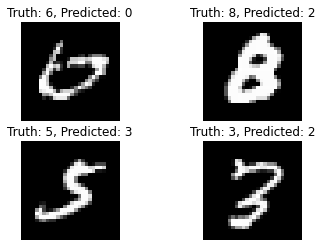

In [48]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtest[wrong_indices[0][i+9]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Truth: " + str(Ytest[wrong_indices[0][i+9]]) + ", Predicted: " +str(MLP.predict_classes(Xtest_reshape)[wrong_indices[0][i+9]])  )
plt.show()

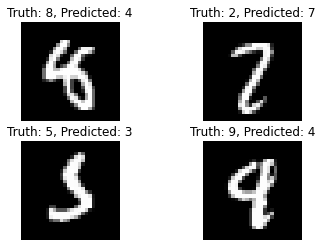

In [49]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtest[wrong_indices[0][4+i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Truth: " + str(Ytest[wrong_indices[0][i+4]]) + ", Predicted: " +str(MLP.predict_classes(Xtest_reshape)[wrong_indices[0][4+i]])  )
plt.show()

#### <font color=red> Neural network parameters: Optimisers, number of epoches, network parameters, optimisers, batch size, different types of layers, convolutional layers VS dense layers </font>

#### <font color=red> Machine Learning concepts: Backpropagation, global vs local minima, explainability, hyperparameter optimization, activation functions, probability outputs </font>

#### For further reference: Stanford CS231n Convolutional Neural Networks, 2 Blue 1 Brown Neural Networks, Tensorflow Documentation